In [21]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM,Dense
import pandas_datareader as web
plt.style.use("fivethirtyeight")
import datetime as dt
import yfinance as yf

In [22]:
company = 'THYAO.IS'

# Bir başlangıç ​​tarihi ve Bitiş Tarihi tanımlayın
start = dt.datetime(2020,1,1)
end =  dt.datetime(2024,5,1)

# Hisse Senedi Fiyat Verilerini Oku
df = yf.download(company, start , end)

df.tail(10)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-03-13,139.899994,140.100006,135.500000,135.800003,135.800003,25099830
2023-03-14,136.000000,137.300003,132.300003,132.300003,132.300003,21213187
2023-03-15,132.800003,134.300003,129.600006,130.899994,130.899994,25320121
2023-03-16,132.000000,133.399994,130.100006,132.199997,132.199997,23362097
2023-03-17,133.600006,134.399994,126.500000,126.500000,126.500000,26317980
2023-03-20,127.000000,129.300003,124.699997,126.099998,126.099998,29507963
2023-03-21,126.800003,127.099998,122.500000,123.900002,123.900002,30417591
2023-03-22,124.400002,127.900002,122.800003,127.900002,127.900002,28343051
2023-03-23,127.400002,129.500000,125.800003,129.399994,129.399994,21951569


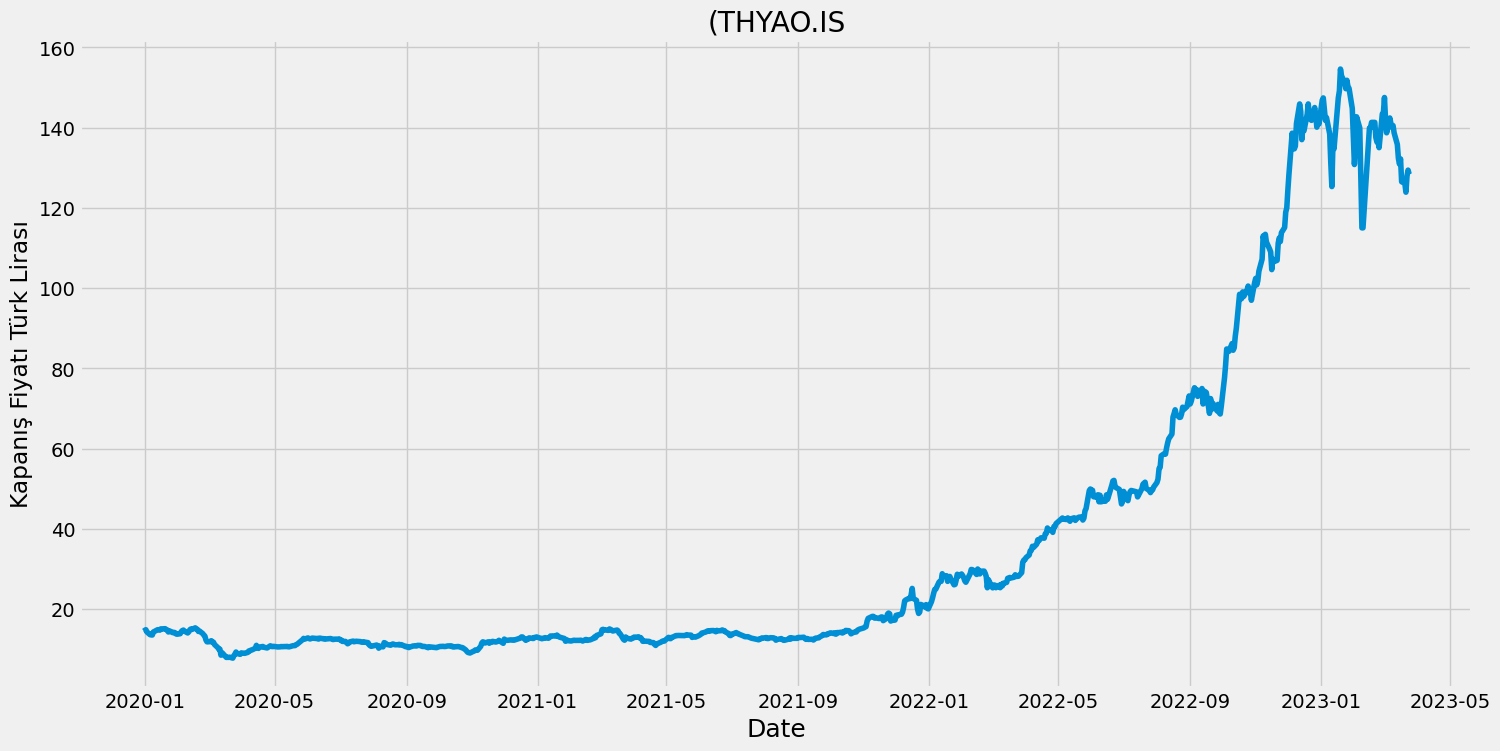

In [23]:
#Verileri filtrele
data = df.filter(["Close"])

#Görselleştirme
plt.figure(figsize=(16,8))
plt.plot(data["Close"])
plt.xlabel("Date",fontsize=18)
plt.ylabel("Kapanış Fiyatı Türk Lirası")
plt.title("(THYAO.IS")
plt.show()

In [24]:
#Yalnızca Kapat sütunuyla yeni bir DataFrame oluştur
data = df.filter(["Close"])

#Veri çerçevesini bir numpy dizisine dönüştür
dataset = data.values

#Modeli eğitmek için satır sayısını al
training_data_len = math.ceil(len(dataset) * 0.8)
print(training_data_len)

649


In [25]:
#Verileri ölçeklendir
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.04575786],
       [0.04827727],
       [0.04446412],
       [0.03969767],
       [0.03949339],
       [0.03922103],
       [0.04439602],
       [0.04528122],
       [0.04827727],
       [0.04820918],
       [0.04752826],
       [0.0497072 ],
       [0.04957102],
       [0.04997957],
       [0.04841346],
       [0.04780063],
       [0.04439602],
       [0.0463026 ],
       [0.04330655],
       [0.0437151 ],
       [0.04337464],
       [0.0411957 ],
       [0.04058287],
       [0.04146806],
       [0.04494076],
       [0.04677924],
       [0.04759635],
       [0.04575786],
       [0.04276182],
       [0.0446003 ],
       [0.04820918],
       [0.04950293],
       [0.04868583],
       [0.0514095 ],
       [0.04943484],
       [0.04895819],
       [0.04528122],
       [0.04596214],
       [0.04167234],
       [0.03922103],
       [0.03751873],
       [0.03084571],
       [0.02764538],
       [0.02798584],
       [0.02955195],
       [0.02737301],
       [0.02703255],
       [0.023

In [26]:
#Eğitim veri setini oluştur
#Ölçeklendirilmiş eğitim veri setini oluştur

train_data = scaled_data[0:training_data_len,:]

#Verileri x_train ve y_train veri kümelerine ayırın
x_train = []
y_train = []

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i <= 60:
    print(x_train)
    print(y_train)
    print()

[array([0.04575786, 0.04827727, 0.04446412, 0.03969767, 0.03949339,
       0.03922103, 0.04439602, 0.04528122, 0.04827727, 0.04820918,
       0.04752826, 0.0497072 , 0.04957102, 0.04997957, 0.04841346,
       0.04780063, 0.04439602, 0.0463026 , 0.04330655, 0.0437151 ,
       0.04337464, 0.0411957 , 0.04058287, 0.04146806, 0.04494076,
       0.04677924, 0.04759635, 0.04575786, 0.04276182, 0.0446003 ,
       0.04820918, 0.04950293, 0.04868583, 0.0514095 , 0.04943484,
       0.04895819, 0.04528122, 0.04596214, 0.04167234, 0.03922103,
       0.03751873, 0.03084571, 0.02764538, 0.02798584, 0.02955195,
       0.02737301, 0.02703255, 0.02308321, 0.01797631, 0.01518453,
       0.01518453, 0.00503881, 0.00926052, 0.00333651, 0.00122566,
       0.00136184, 0.00129375, 0.00163421, 0.        , 0.00388125])]
[0.006809205752971559]



In [27]:
#x_train ve y_train'i numpy dizilerine dönüştür
x_train,y_train = np.array(x_train),np.array(y_train)

In [28]:
#Verileri yeniden şekillendir
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(589, 60, 1)

In [29]:
#LSTM Modelini Oluşturun
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [30]:
#Modeli derle
model.compile(optimizer="adam",loss="mean_squared_error")

In [31]:

#Modeli eğit
model.fit(x_train,y_train,batch_size=1, epochs=1)

589/589 [==============================] - 9s 12ms/step - loss: 4.4924e-04


In [32]:
#Test veri setini oluştur
#1543'ten 2003'e ölçeklenmiş değerler içeren yeni bir dizi oluştur

test_data = scaled_data[training_data_len - 60:, :]

#x_test ve y_test veri kümelerini oluştur

x_test = []
y_test = dataset[training_data_len:,:]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [33]:
#Verileri bir numpy dizisine dönüştür
x_test = np.array(x_test)

In [34]:
#Verileri yeniden şekillendir
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))

In [35]:
#Modellerin tahmin edilen fiyat değerlerini alın
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

6/6 [==============================] - 0s 9ms/step


In [36]:
#Kök ortalama kare hatasını al (RMSE)
rmse = np.sqrt( np.mean(predictions - y_test)**2)
rmse

0.609606307229878

C:\Users\Serkan POLAT\AppData\Local\Temp\ipykernel_11840\3433327778.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Predictions"] = predictions


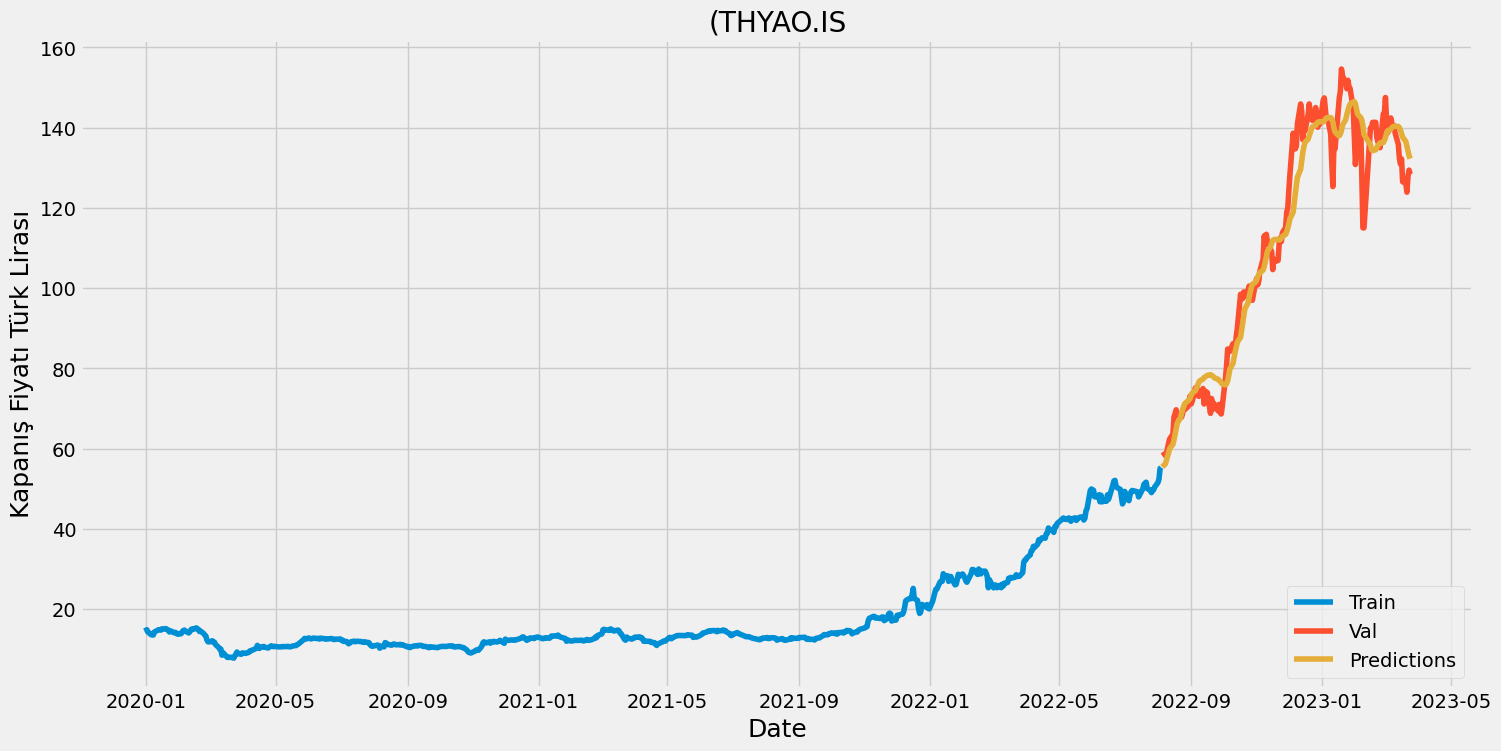

In [37]:
#Verileri çiz
train = data[:training_data_len]
valid = data[training_data_len:]
valid["Predictions"] = predictions

#Verileri görselleştirin
plt.figure(figsize=(16,8))
plt.title("(THYAO.IS")
plt.xlabel("Date",fontsize=18)
plt.ylabel("Kapanış Fiyatı Türk Lirası",fontsize=18)
plt.plot(train["Close"])
plt.plot(valid[["Close","Predictions"]])
plt.legend(["Train","Val","Predictions"], loc="lower right")
plt.show()